# FINRL-> FINLAB Port


In [1]:
TRAIN_START_DATE = '2013-01-01'
TRAIN_END_DATE = '2020-01-01'
TRADE_START_DATE = '2020-01-01'
TRADE_END_DATE = '2023-01-02'

In [68]:
import pandas as pd
import pickle
import talib
from finlab import data
data.set_storage(data.FileStorage())

#df_high = data.get("price:最高價")
#df_low = data.get("price:最低價")
#df_open = data.get("price:開盤價")
#df_close = data.get("price:收盤價")
df_open = pickle.load(open('finlab_db/price#開盤價.pickle', 'rb'))
df_high = pickle.load(open('finlab_db/price#最高價.pickle', 'rb'))
df_close = pickle.load(open('finlab_db/price#收盤價.pickle', 'rb'))
df_low = pickle.load(open('finlab_db/price#最低價.pickle', 'rb'))
df_vol = pickle.load(open('finlab_db/price#成交股數.pickle', 'rb'))


#Compute TAs from finlab supported ta libs.
df_rsi = data.indicator('RSI', timeperiod=14)
df_macd,_,_ = data.indicator('MACD',upper=12,lower=26)
df_sma30 = data.indicator('SMA', timeperiod=30)
slowk,slowd = data.indicator("STOCH",adjust_price=False, resample="D", fastk_period=5,slowk_period=3,slowk_matype=0,slowd_period=3,slowd_matype=0)


In [69]:
#set index of 'date' into column.
df_high = df_high.reset_index().rename(columns={'index': 'date'})
df_low = df_low.reset_index().rename(columns={'index': 'date'})
df_open = df_open.reset_index().rename(columns={'index': 'date'})
df_close = df_close.reset_index().rename(columns={'index': 'date'})
df_vol= df_vol.reset_index().rename(columns={'index': 'date'})
df_rsi = df_rsi.reset_index().rename(columns={'index': 'date'})
df_macd = df_macd.reset_index().rename(columns={'index': 'date'})
df_sma30 = df_sma30.reset_index().rename(columns={'index': 'date'})
slowk = slowk.reset_index().rename(columns={'index': 'date'})
slowd = slowd.reset_index().rename(columns={'index': 'date'})

#Meltdown the columns, index with date, column variable name 'tic', col_name = 'Close'
df_melto = df_open.melt(id_vars=['date'], var_name='tic', value_name='open')
df_melth = df_high.melt(id_vars=['date'], var_name='tic', value_name='high')
df_meltl = df_low.melt(id_vars=['date'], var_name='tic', value_name='low')
df_meltc = df_close.melt(id_vars=['date'], var_name='tic', value_name='close')
df_meltv = df_vol.melt(id_vars=['date'], var_name='tic', value_name='vol')
df_meltrsi = df_rsi.melt(id_vars=['date'], var_name='tic', value_name='rsi_14')
df_meltmacd = df_macd.melt(id_vars=['date'], var_name='tic', value_name='macd')
df_meltsma30 = df_sma30.melt(id_vars=['date'], var_name='tic', value_name='sma_30')
df_meltslowk = slowk.melt(id_vars=['date'], var_name='tic', value_name='slowk')
df_meltslowd = slowd.melt(id_vars=['date'], var_name='tic', value_name='slowd')



In [70]:
df_merged = pd.merge(df_melto, df_melth, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltl, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltc, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltv, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltrsi, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltmacd, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltsma30, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltslowk, on=['date','tic'], how='outer')
df_merged = pd.merge(df_merged, df_meltslowd, on=['date','tic'], how='outer')

In [71]:
df_merged.tail(10)

,date,tic,open,high,low,close,vol,rsi_14,macd,sma_30,slowk,slowd
9286929,2023-02-13,9962,19.35,19.70,19.20,19.70,726346.0,69.522942,0.637439,18.353333,61.535948,69.033224
9286930,2023-02-14,9962,19.70,20.30,19.55,19.80,2213532.0,70.589028,0.630049,18.438333,58.051099,61.855813
9286931,2023-02-15,9962,19.85,19.85,19.60,19.80,550815.0,70.589028,0.617078,18.523333,58.585859,59.390969
9286932,2023-02-16,9962,19.80,20.25,19.80,20.20,1065790.0,74.695319,0.631793,18.621667,66.666667,61.101208
9286933,2023-02-17,9962,20.20,20.20,20.00,20.15,312684.0,73.317343,0.632134,18.721667,77.272727,67.508418
9286934,2023-02-20,9962,20.15,20.60,20.15,20.60,960416.0,77.364623,0.661094,18.838333,92.424242,78.787879
9286935,2023-02-21,9962,20.70,21.25,20.60,21.25,1472442.0,81.685845,0.728101,18.975000,95.454545,88.383838
9286936,2023-02-22,9962,21.25,21.40,20.85,21.35,1100907.0,82.247350,0.780280,19.123333,98.958333,95.612374
9286937,2023-02-23,9962,21.40,21.50,20.75,20.80,1760402.0,69.606810,0.768394,19.246667,83.402778,92.605219
9286938,2023-02-24,9962,20.85,20.90,20.30,20.75,1145869.0,68.574996,0.746336,19.355000,64.884259,82.415123


In [ ]:
# Find loc in df under date key for values >= x
df_filtered = df_merged.loc[(df_merged['date'] >= TRAIN_START_DATE)]
# Drop NaN values in columns 'B' and 'C'
df_filtered = df_filtered.dropna(subset=['open','high','low','close'])
df_filtered['date'] = df_filtered['date'].dt.strftime('%Y-%m-%d')
df_filtered.tail()

In [11]:
df_filtered.shape

(4371043, 9)

In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl import config
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [13]:
df = df_filtered.sort_values(['date','tic'],ignore_index=True)
#Filter out specific ticker for testing.
df

,date,tic,open,high,low,close,vol,rsi_14,macd
0,2013-01-02,0015,7.55,7.64,7.55,7.64,12000.0,76.756340,0.076264
1,2013-01-02,0050,54.00,54.65,53.90,54.40,16487837.0,63.282179,0.337700
2,2013-01-02,0051,25.75,26.10,25.75,26.09,277083.0,66.305809,0.176915
3,2013-01-02,0052,32.30,32.76,32.30,32.72,26000.0,67.073467,0.284897
4,2013-01-02,0053,23.30,23.30,22.92,23.26,42109.0,64.837034,0.107347
...,...,...,...,...,...,...,...,...,...
4371038,2023-02-24,9951,70.40,70.70,70.20,70.30,94190.0,64.937305,0.994693
4371039,2023-02-24,9955,21.50,21.50,21.10,21.10,376645.0,50.013758,0.001546
4371040,2023-02-24,9958,106.50,106.50,103.50,104.00,2087427.0,60.581356,3.183793
4371041,2023-02-24,9960,26.70,27.60,26.70,27.20,102858.0,72.374758,0.221387


In [14]:
# Show list of indicators 
INDICATORS

['macd', 'rsi_14']

In [19]:
list_ticker = df["tic"].unique().tolist()
list_ticker[:10]

['0050', '2330']

In [20]:
df = df.loc[df['tic'].isin(['0050', '2330'])]
df.head()

,date,tic,open,high,low,close,vol,rsi_14,macd
1,2013-01-02,0050,54.00,54.65,53.90,54.40,16487837.0,63.282179,0.337700
324,2013-01-02,2330,97.60,99.90,97.10,99.60,40647121.0,64.042988,0.818715
1465,2013-01-03,0050,54.90,55.05,54.65,54.85,29020585.0,66.622750,0.415207
1787,2013-01-03,2330,100.50,102.00,100.00,101.00,44335846.0,67.512527,1.091890
2925,2013-01-04,0050,54.85,54.85,54.40,54.50,9837846.0,61.905254,0.443280


In [21]:
ticker_list = ['0050', '2330']


In [22]:
list_date = list(pd.date_range(df['date'].min(),df['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))
processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(df['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)


In [23]:
processed_full.sort_values(['date','tic'],ignore_index=True).tail(10)

,date,tic,open,high,low,close,vol,rsi_14,macd
4956,2023-02-20,0050,118.55,119.35,118.10,119.00,6230136.0,53.295622,1.364937
4957,2023-02-20,2330,514.00,519.00,511.00,517.00,21181235.0,51.490564,11.564249
4958,2023-02-21,0050,119.00,119.10,118.55,118.95,4772315.0,53.104536,1.215772
4959,2023-02-21,2330,515.00,517.00,513.00,516.00,15097509.0,50.995594,9.881208
4960,2023-02-22,0050,117.50,117.75,117.10,117.65,12041784.0,48.259688,0.981346
4961,2023-02-22,2330,506.00,509.00,505.00,507.00,26578867.0,46.649254,7.732032
4962,2023-02-23,0050,117.95,119.80,117.95,119.40,6448658.0,54.303499,0.926097
4963,2023-02-23,2330,512.00,521.00,510.00,518.00,26801677.0,52.030591,6.837583
4964,2023-02-24,0050,119.90,120.10,118.80,118.80,5828709.0,52.058226,0.824394
4965,2023-02-24,2330,524.00,525.00,511.00,511.00,48372303.0,48.666485,5.500478


In [24]:
processed_full.dtypes

date       object
tic        object
open      float64
high      float64
low       float64
close     float64
vol       float64
rsi_14    float64
macd      float64
dtype: object

In [25]:
              train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

3434
1470


In [26]:
train.tail()

,date,tic,open,high,low,close,vol,rsi_14,macd
1714,2019-12-27,2330,335.0,338.00,335.00,338.00,16677806.0,64.243360,7.532292
1715,2019-12-30,0050,98.0,98.25,97.60,97.80,3138762.0,69.268746,1.496978
1715,2019-12-30,2330,338.0,339.00,334.00,334.50,21591263.0,59.977712,7.171788
1716,2019-12-31,0050,97.1,97.20,96.95,96.95,4303947.0,61.056309,1.385115
1716,2019-12-31,2330,331.0,333.50,331.00,331.00,22950517.0,55.975162,6.528409


In [27]:
train.head()

,date,tic,open,high,low,close,vol,rsi_14,macd
0,2013-01-02,0050,54.00,54.65,53.90,54.40,16487837.0,63.282179,0.337700
0,2013-01-02,2330,97.60,99.90,97.10,99.60,40647121.0,64.042988,0.818715
1,2013-01-03,0050,54.90,55.05,54.65,54.85,29020585.0,66.622750,0.415207
1,2013-01-03,2330,100.50,102.00,100.00,101.00,44335846.0,67.512527,1.091890
2,2013-01-04,0050,54.85,54.85,54.40,54.50,9837846.0,61.905254,0.443280


In [28]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 2, State Space: 9


In [29]:
print(df.dtypes)


date       object
tic        object
open      float64
high      float64
low       float64
close     float64
vol       float64
rsi_14    float64
macd      float64
dtype: object


In [30]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [31]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [32]:
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = True
if_using_td3 = False
if_using_sac = False


In [33]:
agent = DRLAgent(env = env_train)

A2C_PARAMS= {'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007,"device":"cpu"}
    

model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007, 'device': 'cpu'}
Using cpu device


In [34]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=50000) if if_using_a2c else None

In [35]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
    "device":"cpu"
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  #new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  new_logger_ppo = configure(tmp_path, ["stdout", "csv"])
# Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128, 'device': 'cpu'}
Using cpu device
Logging to results/ppo


In [43]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=500000) if if_using_ppo else None

-----------------------------------------
| time/                   |             |
|    fps                  | 1184        |
|    iterations           | 1           |
|    time_elapsed         | 1           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.002214469 |
|    clip_fraction        | 0.00674     |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.79       |
|    explained_variance   | 0.0552      |
|    learning_rate        | 0.00025     |
|    loss                 | 15.6        |
|    n_updates            | 250         |
|    policy_gradient_loss | -0.00221    |
|    reward               | 1.197402    |
|    std                  | 0.978       |
|    value_loss           | 32.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1081         |
|    iterations           | 2  

-----------------------------------------
| time/                   |             |
|    fps                  | 1006        |
|    iterations           | 11          |
|    time_elapsed         | 22          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.004963373 |
|    clip_fraction        | 0.0403      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.81       |
|    explained_variance   | 0.0396      |
|    learning_rate        | 0.00025     |
|    loss                 | 20          |
|    n_updates            | 350         |
|    policy_gradient_loss | -0.00659    |
|    reward               | -0.08828824 |
|    std                  | 0.987       |
|    value_loss           | 42.5        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1005         |
|    iterations           | 12 

-----------------------------------------
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 21          |
|    time_elapsed         | 43          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.006090872 |
|    clip_fraction        | 0.0469      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.81       |
|    explained_variance   | 0.0924      |
|    learning_rate        | 0.00025     |
|    loss                 | 9.05        |
|    n_updates            | 450         |
|    policy_gradient_loss | -0.00268    |
|    reward               | -0.082097   |
|    std                  | 0.99        |
|    value_loss           | 20.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 994         |
|    iterations           | 22    

----------------------------------------
| time/                   |            |
|    fps                  | 991        |
|    iterations           | 31         |
|    time_elapsed         | 64         |
|    total_timesteps      | 63488      |
| train/                  |            |
|    approx_kl            | 0.00447761 |
|    clip_fraction        | 0.0338     |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.85      |
|    explained_variance   | 0.0875     |
|    learning_rate        | 0.00025    |
|    loss                 | 16.8       |
|    n_updates            | 550        |
|    policy_gradient_loss | -0.0023    |
|    reward               | 2.84095    |
|    std                  | 1          |
|    value_loss           | 30.9       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 991         |
|    iterations           | 32          |
|    time_el

------------------------------------------
| time/                   |              |
|    fps                  | 990          |
|    iterations           | 41           |
|    time_elapsed         | 84           |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0053104805 |
|    clip_fraction        | 0.0342       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.85        |
|    explained_variance   | 0.0214       |
|    learning_rate        | 0.00025      |
|    loss                 | 4.48         |
|    n_updates            | 650          |
|    policy_gradient_loss | -0.00178     |
|    reward               | 1.8176323    |
|    std                  | 1.01         |
|    value_loss           | 11           |
------------------------------------------
day: 1716, episode: 80
begin_total_asset: 1000000.00
end_total_asset: 2068565.87
total_reward: 1068565.87
total_cost: 14933.38
total_trades:

------------------------------------------
| time/                   |              |
|    fps                  | 987          |
|    iterations           | 51           |
|    time_elapsed         | 105          |
|    total_timesteps      | 104448       |
| train/                  |              |
|    approx_kl            | 0.0036312914 |
|    clip_fraction        | 0.00552      |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.85        |
|    explained_variance   | 0.141        |
|    learning_rate        | 0.00025      |
|    loss                 | 18           |
|    n_updates            | 750          |
|    policy_gradient_loss | -0.000685    |
|    reward               | 1.3658649    |
|    std                  | 1.01         |
|    value_loss           | 34.3         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 986          |
|    iterat

------------------------------------------
| time/                   |              |
|    fps                  | 983          |
|    iterations           | 61           |
|    time_elapsed         | 127          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0025528658 |
|    clip_fraction        | 0.0239       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.85        |
|    explained_variance   | 0.142        |
|    learning_rate        | 0.00025      |
|    loss                 | 19           |
|    n_updates            | 850          |
|    policy_gradient_loss | -0.000463    |
|    reward               | -3.7360497   |
|    std                  | 1.01         |
|    value_loss           | 36.3         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 982         |
|    iteration

-------------------------------------------
| time/                   |               |
|    fps                  | 981           |
|    iterations           | 71            |
|    time_elapsed         | 148           |
|    total_timesteps      | 145408        |
| train/                  |               |
|    approx_kl            | 0.00039426106 |
|    clip_fraction        | 4.88e-05      |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.88         |
|    explained_variance   | 0.188         |
|    learning_rate        | 0.00025       |
|    loss                 | 21.5          |
|    n_updates            | 950           |
|    policy_gradient_loss | -0.000148     |
|    reward               | -5e-06        |
|    std                  | 1.02          |
|    value_loss           | 38.5          |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 981   

------------------------------------------
| time/                   |              |
|    fps                  | 980          |
|    iterations           | 81           |
|    time_elapsed         | 169          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0029380545 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.85        |
|    explained_variance   | 0.165        |
|    learning_rate        | 0.00025      |
|    loss                 | 18.6         |
|    n_updates            | 1050         |
|    policy_gradient_loss | -0.000122    |
|    reward               | 1.4314425    |
|    std                  | 1.01         |
|    value_loss           | 37.2         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 980         |
|    iteration

------------------------------------------
| time/                   |              |
|    fps                  | 978          |
|    iterations           | 91           |
|    time_elapsed         | 190          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0010290745 |
|    clip_fraction        | 0.0263       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.88        |
|    explained_variance   | 0.231        |
|    learning_rate        | 0.00025      |
|    loss                 | 21.4         |
|    n_updates            | 1150         |
|    policy_gradient_loss | -0.000724    |
|    reward               | 2.3742528    |
|    std                  | 1.02         |
|    value_loss           | 35.6         |
------------------------------------------
day: 1716, episode: 140
begin_total_asset: 1000000.00
end_total_asset: 3141587.28
total_reward: 2141587.28
total_cost: 3158.72
total_trades:

-----------------------------------------
| time/                   |             |
|    fps                  | 976         |
|    iterations           | 101         |
|    time_elapsed         | 211         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.005353636 |
|    clip_fraction        | 0.0438      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.88       |
|    explained_variance   | 0.129       |
|    learning_rate        | 0.00025     |
|    loss                 | 13.6        |
|    n_updates            | 1250        |
|    policy_gradient_loss | -0.00274    |
|    reward               | -0.4798063  |
|    std                  | 1.02        |
|    value_loss           | 35.9        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 976         |
|    iterations           | 102   

------------------------------------------
| time/                   |              |
|    fps                  | 974          |
|    iterations           | 111          |
|    time_elapsed         | 233          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0063139955 |
|    clip_fraction        | 0.0578       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.86        |
|    explained_variance   | 0.262        |
|    learning_rate        | 0.00025      |
|    loss                 | 15.1         |
|    n_updates            | 1350         |
|    policy_gradient_loss | -0.00141     |
|    reward               | 0.47567      |
|    std                  | 1.01         |
|    value_loss           | 35.2         |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 974           |
|    ite

------------------------------------------
| time/                   |              |
|    fps                  | 973          |
|    iterations           | 121          |
|    time_elapsed         | 254          |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0019724206 |
|    clip_fraction        | 0.00913      |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.89        |
|    explained_variance   | 0.266        |
|    learning_rate        | 0.00025      |
|    loss                 | 20.9         |
|    n_updates            | 1450         |
|    policy_gradient_loss | 0.000189     |
|    reward               | 0.46524      |
|    std                  | 1.03         |
|    value_loss           | 37.4         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 973         |
|    iteration

-----------------------------------------
| time/                   |             |
|    fps                  | 972         |
|    iterations           | 131         |
|    time_elapsed         | 275         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.005678382 |
|    clip_fraction        | 0.0348      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.89       |
|    explained_variance   | 0.254       |
|    learning_rate        | 0.00025     |
|    loss                 | 19.9        |
|    n_updates            | 1550        |
|    policy_gradient_loss | -0.000996   |
|    reward               | 0.46935     |
|    std                  | 1.03        |
|    value_loss           | 43.1        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 972          |
|    iterations           | 132

------------------------------------------
| time/                   |              |
|    fps                  | 971          |
|    iterations           | 141          |
|    time_elapsed         | 297          |
|    total_timesteps      | 288768       |
| train/                  |              |
|    approx_kl            | 0.0023458563 |
|    clip_fraction        | 0.0279       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.9         |
|    explained_variance   | 0.198        |
|    learning_rate        | 0.00025      |
|    loss                 | 22.5         |
|    n_updates            | 1650         |
|    policy_gradient_loss | -0.00186     |
|    reward               | -1.423355    |
|    std                  | 1.03         |
|    value_loss           | 47.2         |
------------------------------------------
day: 1716, episode: 200
begin_total_asset: 1000000.00
end_total_asset: 3127810.61
total_reward: 2127810.61
total_cost: 4895.69
total_trades:

day: 1716, episode: 210
begin_total_asset: 1000000.00
end_total_asset: 3094605.66
total_reward: 2094605.66
total_cost: 4165.84
total_trades: 3116
Sharpe: 0.847
------------------------------------------
| time/                   |              |
|    fps                  | 969          |
|    iterations           | 151          |
|    time_elapsed         | 318          |
|    total_timesteps      | 309248       |
| train/                  |              |
|    approx_kl            | 0.0017006104 |
|    clip_fraction        | 0.0304       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.9         |
|    explained_variance   | 0.113        |
|    learning_rate        | 0.00025      |
|    loss                 | 25.1         |
|    n_updates            | 1750         |
|    policy_gradient_loss | -0.00115     |
|    reward               | 1.400675     |
|    std                  | 1.03         |
|    value_loss           | 47.4         |
-----------------------

-----------------------------------------
| time/                   |             |
|    fps                  | 969         |
|    iterations           | 161         |
|    time_elapsed         | 340         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.002164239 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.93       |
|    explained_variance   | 0.0542      |
|    learning_rate        | 0.00025     |
|    loss                 | 23.7        |
|    n_updates            | 1850        |
|    policy_gradient_loss | 0.000143    |
|    reward               | -0.63727045 |
|    std                  | 1.05        |
|    value_loss           | 47.3        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 969          |
|    iterations           | 162

------------------------------------------
| time/                   |              |
|    fps                  | 968          |
|    iterations           | 171          |
|    time_elapsed         | 361          |
|    total_timesteps      | 350208       |
| train/                  |              |
|    approx_kl            | 0.0037703807 |
|    clip_fraction        | 0.0274       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.95        |
|    explained_variance   | 0.119        |
|    learning_rate        | 0.00025      |
|    loss                 | 19.3         |
|    n_updates            | 1950         |
|    policy_gradient_loss | -0.00202     |
|    reward               | 1.40013      |
|    std                  | 1.06         |
|    value_loss           | 38.6         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 968          |
|    iterat

------------------------------------------
| time/                   |              |
|    fps                  | 967          |
|    iterations           | 181          |
|    time_elapsed         | 383          |
|    total_timesteps      | 370688       |
| train/                  |              |
|    approx_kl            | 0.0088701015 |
|    clip_fraction        | 0.027        |
|    clip_range           | 0.2          |
|    entropy_loss         | -3           |
|    explained_variance   | 0.166        |
|    learning_rate        | 0.00025      |
|    loss                 | 17.5         |
|    n_updates            | 2050         |
|    policy_gradient_loss | 0.000143     |
|    reward               | 0.9365       |
|    std                  | 1.09         |
|    value_loss           | 35           |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 967          |
|    iterat

------------------------------------------
| time/                   |              |
|    fps                  | 967          |
|    iterations           | 191          |
|    time_elapsed         | 404          |
|    total_timesteps      | 391168       |
| train/                  |              |
|    approx_kl            | 0.0022687446 |
|    clip_fraction        | 0.0192       |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.02        |
|    explained_variance   | 0.241        |
|    learning_rate        | 0.00025      |
|    loss                 | 16.9         |
|    n_updates            | 2150         |
|    policy_gradient_loss | -0.000883    |
|    reward               | -2.33628     |
|    std                  | 1.1          |
|    value_loss           | 36.8         |
------------------------------------------
day: 1716, episode: 260
begin_total_asset: 1000000.00
end_total_asset: 3087535.10
total_reward: 2087535.10
total_cost: 2656.80
total_trades:

day: 1716, episode: 270
begin_total_asset: 1000000.00
end_total_asset: 3130527.95
total_reward: 2130527.95
total_cost: 2678.25
total_trades: 3051
Sharpe: 0.857
-----------------------------------------
| time/                   |             |
|    fps                  | 966         |
|    iterations           | 201         |
|    time_elapsed         | 425         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.005170823 |
|    clip_fraction        | 0.0179      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.05       |
|    explained_variance   | 0.132       |
|    learning_rate        | 0.00025     |
|    loss                 | 18.7        |
|    n_updates            | 2250        |
|    policy_gradient_loss | -0.00196    |
|    reward               | 1.42636     |
|    std                  | 1.12        |
|    value_loss           | 35.2        |
-----------------------------------------


----------------------------------------
| time/                   |            |
|    fps                  | 965        |
|    iterations           | 211        |
|    time_elapsed         | 447        |
|    total_timesteps      | 432128     |
| train/                  |            |
|    approx_kl            | 0.00564205 |
|    clip_fraction        | 0.0217     |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.09      |
|    explained_variance   | 0.102      |
|    learning_rate        | 0.00025    |
|    loss                 | 21         |
|    n_updates            | 2350       |
|    policy_gradient_loss | -0.00117   |
|    reward               | -2.8554    |
|    std                  | 1.14       |
|    value_loss           | 35.9       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 965         |
|    iterations           | 212         |
|    time_el

------------------------------------------
| time/                   |              |
|    fps                  | 964          |
|    iterations           | 221          |
|    time_elapsed         | 469          |
|    total_timesteps      | 452608       |
| train/                  |              |
|    approx_kl            | 0.0050000683 |
|    clip_fraction        | 0.0318       |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.11        |
|    explained_variance   | 0.174        |
|    learning_rate        | 0.00025      |
|    loss                 | 13.8         |
|    n_updates            | 2450         |
|    policy_gradient_loss | -0.000963    |
|    reward               | -0.00101     |
|    std                  | 1.15         |
|    value_loss           | 34.1         |
------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 964         |
|    iteration

------------------------------------------
| time/                   |              |
|    fps                  | 964          |
|    iterations           | 231          |
|    time_elapsed         | 490          |
|    total_timesteps      | 473088       |
| train/                  |              |
|    approx_kl            | 0.0032337718 |
|    clip_fraction        | 0.00684      |
|    clip_range           | 0.2          |
|    entropy_loss         | -3.12        |
|    explained_variance   | 0.159        |
|    learning_rate        | 0.00025      |
|    loss                 | 11.2         |
|    n_updates            | 2550         |
|    policy_gradient_loss | -0.000479    |
|    reward               | 1.42365      |
|    std                  | 1.15         |
|    value_loss           | 33.4         |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 964          |
|    iterat

-----------------------------------------
| time/                   |             |
|    fps                  | 964         |
|    iterations           | 241         |
|    time_elapsed         | 511         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.005741935 |
|    clip_fraction        | 0.0331      |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.17       |
|    explained_variance   | 0.147       |
|    learning_rate        | 0.00025     |
|    loss                 | 16.2        |
|    n_updates            | 2650        |
|    policy_gradient_loss | -0.000998   |
|    reward               | -0.9404     |
|    std                  | 1.18        |
|    value_loss           | 33.8        |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 964          |
|    iterations           | 242

In [44]:
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)


In [45]:
trained_moedl = trained_ppo
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [46]:
df_account_value.shape

(735, 2)

In [47]:
df_account_value.tail()

,date,account_value
730,2022-12-26,1.355806e+06
731,2022-12-27,1.357680e+06
732,2022-12-28,1.339717e+06
733,2022-12-29,1.325603e+06
734,2022-12-30,1.333122e+06


In [48]:
df_actions.head()

,0050,2330
date,,
2020-01-02,38,100
2020-01-03,38,100
2020-01-06,38,100
2020-01-07,38,100
2020-01-08,38,100


==============Get Backtest Results===========
Annual return          0.103602
Cumulative returns     0.333122
Annual volatility      0.278742
Sharpe ratio           0.492554
Calmar ratio           0.230435
Stability              0.278428
Max drawdown          -0.449594
Omega ratio            1.087453
Sortino ratio          0.751781
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.984210
Daily value at risk   -0.034573
dtype: float64
==============Compare to DJIA===========


/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (733, 8)


/home/ga_aiot/FinRL/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2020-01-02
End date,2022-12-30
Total months,35
,Backtest
Annual return,10.36%
Cumulative returns,33.312%
Annual volatility,27.874%
Sharpe ratio,0.49
Calmar ratio,0.23
Stability,0.28
Max drawdown,-44.959%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,44.96,2022-01-17,2022-10-25,NaT,NaN
1,26.11,2020-01-14,2020-03-19,2020-07-06,125
2,18.14,2021-01-21,2021-05-13,2022-01-14,257
3,7.49,2020-09-16,2020-09-24,2020-10-12,19
4,6.28,2020-10-13,2020-10-30,2020-11-13,24


/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'ob

Stress Events,mean,min,max
New Normal,0.05%,-8.07%,9.53%


/home/ga_aiot/anaconda3/envs/finrl/lib/python3.8/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


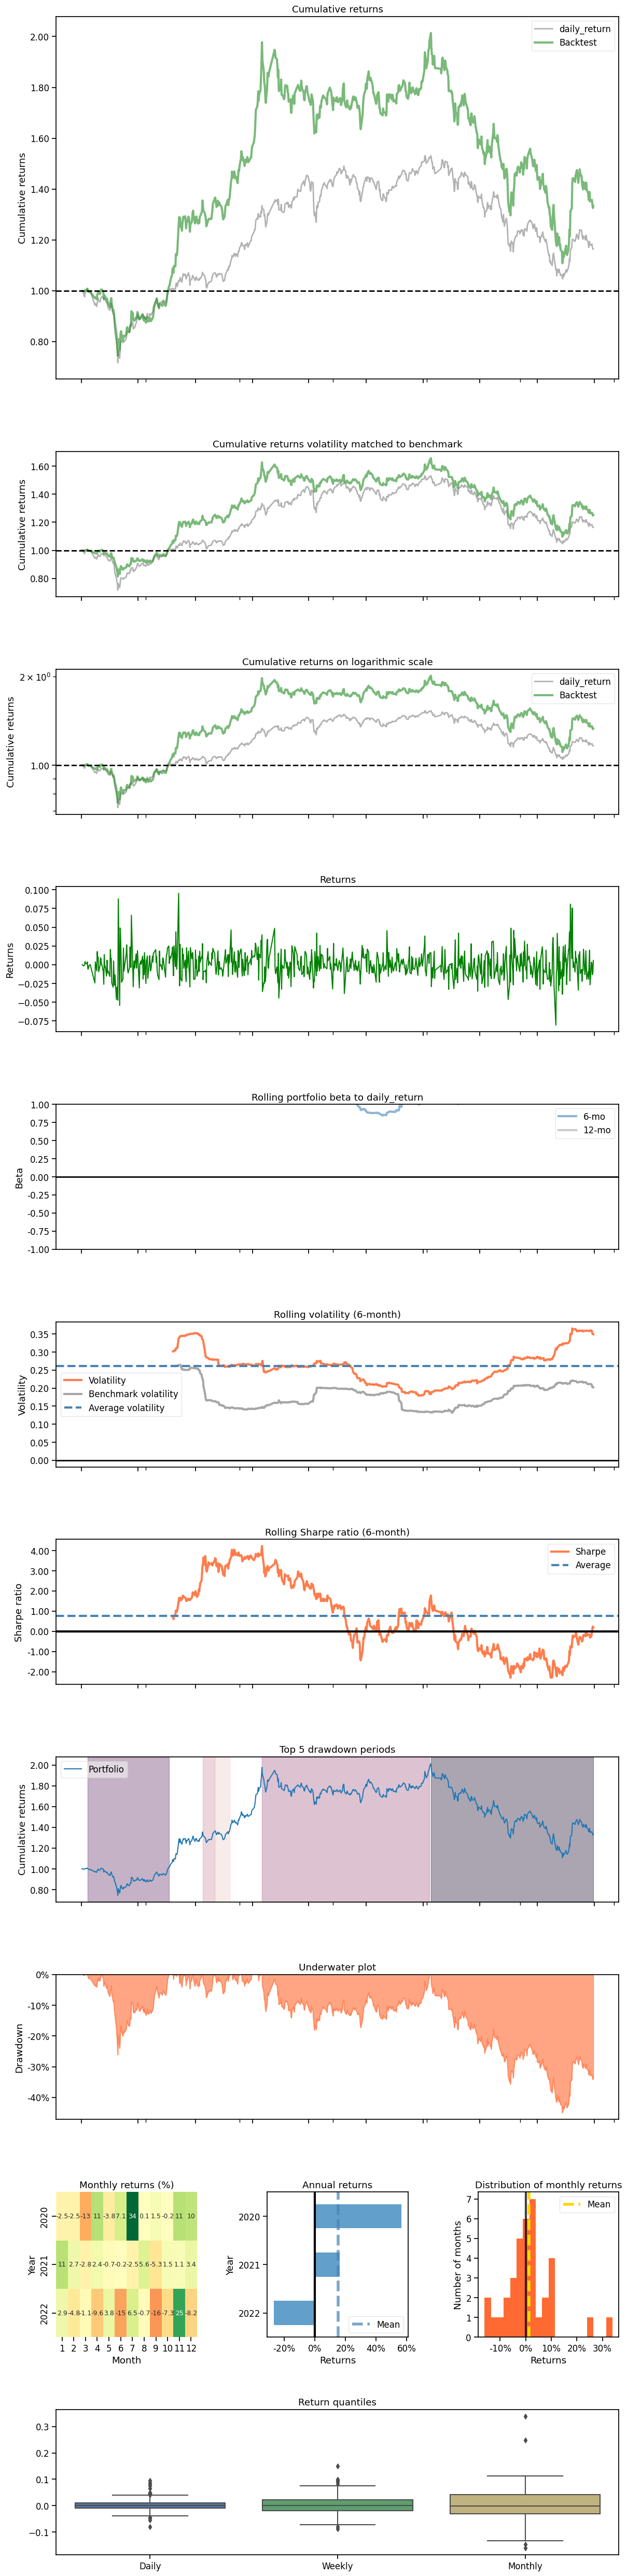

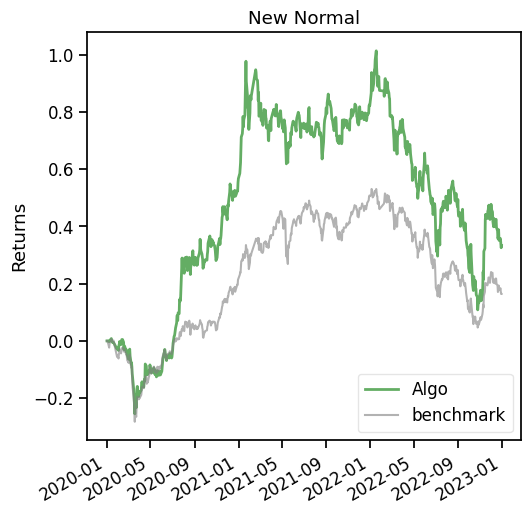

In [49]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# TWSE = ^TWII
backtest_plot(df_account_value, 
             baseline_ticker = '^TWII', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])